<a href="https://colab.research.google.com/github/mahmud-nobe/Cluster-Membership/blob/master/IC_1805/IC_1805_version_2.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Necessary Packages and download the csv files

#### Importing packages

In [2]:
# import packages
import pandas as pd
import pandas_profiling as pd_prof
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for downloading file
from google.colab import files

## Use random forest to create and evaluate new model
from sklearn.ensemble import RandomForestRegressor

In [3]:
!pip install astroquery

     |████████████████████████████████| 6.5MB 5.7MB/s 
     |████████████████████████████████| 51kB 8.2MB/s 
     |████████████████████████████████| 2.6MB 46.1MB/s 
  Created wheel for astroquery: filename=astroquery-0.4.1-cp36-none-any.whl size=3831874 sha256=de84960163198ea2db1db1dba4ca3bc563cf7536c929f4abeb993404304cb72a
  Stored in directory: /root/.cache/pip/wheels/88/f8/b7/a254cd96e808f708bc0b7d755a8e095c56fbbe94099d7b464f
Successfully built astroquery


In [4]:
# import astroquery
import astropy.units as u
import astropy.coordinates as coord
from astroquery.gaia import Gaia
from astroquery.vizier import Vizier


Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


#### Finding GAIA Data

In [5]:
## making a GAIA cone_search of 30m radius around IC1805 center

coordinate = coord.SkyCoord.from_name('IC1805')
print(coordinate)
radius = u.Quantity(0.6, u.deg)
Gaia.ROW_LIMIT = -1
j = Gaia.cone_search_async(coordinate, radius)
r = j.get_results()
print(type(r))

<SkyCoord (ICRS): (ra, dec) in deg
    (38.175, 61.45)>
INFO: Query finished. [astroquery.utils.tap.core]
<class 'astropy.table.table.Table'>


In [6]:
## save the ASCII table as a panadas dataframe
all_stars = r.to_pandas()
all_stars

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist
0,1635721458409799680,Gaia DR2 465528726379405696,465528726379405696,247964031,2015.5,38.177112,0.554648,61.450483,0.609400,1.765231,0.769221,2.294829,-1.217923,0.935301,0.826493,1.208420,0.110764,0.039704,-0.548879,0.208537,-0.306737,0.181764,0.092372,-0.152621,-0.059522,0.098671,272,0,270,2,5.630649,416.011017,2.240920,3.162287e+00,31,False,0.032422,1.050447,0.128913,-0.059176,...,365.432711,12.216329,29.913464,18.354902,3.558765,0,1.338949,-0.524485,1.863434,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.726376,0.919658,58.803635,43.504977,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.001112
1,1635721458409799680,Gaia DR2 465528722077474176,465528722077474176,532618104,2015.5,38.173126,0.195596,61.448828,0.223026,0.485018,0.273150,1.775644,-1.252496,0.308658,-0.557193,0.520266,0.090727,0.080372,-0.703858,0.043827,-0.001763,0.011196,-0.234885,-0.112208,-0.194637,0.132936,350,0,348,2,2.492240,411.750702,0.597085,1.231175e+00,31,False,0.225304,1.251449,0.045914,-0.025778,...,728.827109,9.462338,77.024002,17.605358,2.025694,0,2.002157,0.570684,1.431473,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.725244,0.917403,58.800282,43.504305,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.001479
2,1635721458409799680,Gaia DR2 465528726379405440,465528726379405440,1283651393,2015.5,38.172314,0.423892,61.451231,0.538058,0.062564,0.635088,0.098512,1.224278,0.695127,0.686585,1.155529,-0.032334,0.062870,-0.658227,0.092028,-0.183861,0.026078,0.209751,-0.043140,0.064907,-0.108643,286,0,284,2,4.475788,397.799500,1.678573,2.132602e+00,31,False,0.048033,1.173376,0.107343,-0.088620,...,377.982854,8.946186,42.250725,18.318239,3.174750,0,1.303114,-0.424246,1.727360,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.723971,0.919477,58.801227,43.506640,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.001785
3,1635721458409799680,Gaia DR2 465528726379405056,465528726379405056,181327803,2015.5,38.178915,0.149113,61.450697,0.164303,0.618628,0.205993,3.003147,-0.576566,0.267372,0.189691,0.370243,0.072195,-0.050279,-0.611804,0.154452,-0.259068,-0.004170,0.083585,0.111078,-0.174088,-0.122973,259,0,256,3,2.311016,305.660400,0.484698,1.279618e+00,31,False,0.446387,1.381541,0.036848,-0.009684,...,1064.630714,24.601653,43.274765,17.193922,1.941268,0,1.815165,0.472721,1.342443,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.727092,0.920184,58.804834,43.504799,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.001989
4,1635721458

In [7]:
all_stars[all_stars['parallax_over_error'] > 5]

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist
8,1635721458409799680,Gaia DR2 465528726373337088,465528726373337088,1660500550,2015.5,38.175354,0.290478,61.454596,0.394198,4.784557,0.565607,8.459159,-1.618027,0.441524,-3.135104,0.840389,-0.059969,0.282473,-0.657306,-0.112270,-0.356095,0.019607,-0.123048,-0.214755,0.044362,0.129218,128,0,128,0,25.442947,1106.305420,1.788871,37.097147,31,False,0.229808,1.179883,0.074927,0.059227,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.724034,0.923142,58.805035,43.509050,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.004600
12,1635721458409799680,Gaia DR2 465528726370386560,465528726370386560,1265691026,2015.5,38.174604,0.026692,61.455837,0.024871,0.350408,0.032867,10.661463,-0.391319,0.039899,-0.923878,0.056511,0.048533,0.069835,-0.724254,0.110574,0.030926,0.063572,-0.152112,-0.095759,-0.013781,0.093028,363,0,358,5,13.155964,829.465881,0.197810,9.855362,31,False,16.322571,1.582204,0.005890,-0.099154,...,4.978108e+04,4011.776907,12.408737,13.019259,2.141917,0,1.012991,-0.179126,1.192117,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.723230,0.924154,58.805327,43.510325,102011,5095.633301,4259.000000,6938.000000,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.005842
13,1635721458409799680,Gaia DR2 465528722079282688,465528722079282688,1058312376,2015.5,38.170187,0.016606,61.455589,0.016178,0.437090,0.021993,19.874382,-0.694467,0.023946,-0.802570,0.036297,-0.002689,0.159078,-0.754454,0.121217,0.069633,0.064263,-0.244543,-0.132432,-0.023107,-0.004449,384,0,381,3,-2.515826,310.555786,0.000000,0.000000,31,False,70.747940,1.514005,0.003501,-0.095636,...,4.806036e+04,153.224776,313.659210,13.057452,1.283723,0,1.332185,0.578085,0.754100,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.721372,0.923120,58.802553,43.511010,100001,4767.000000,4554.893066,4990.000000,NaN,NaN,NaN,NaN,NaN,NaN,200111,5.413865,4.940792,5.929817,13.636097,11.825031,15.447163,https://gea.esac.esa.int/data-server/datalink/...,,0.006048
14,1635721458409799680,Gaia DR2 465528726379402112,465528726379402112,510287181,2015.5,38.177232,0.063257,61.455989,0.071002,0.465485,0.085514,5.443405,-0.441348,0.096515,-1.487824,0.150428,-0.089893,0.000653,-0.722535,0.157880,-0.002443,0.141679,-0.389349,-0.005071,0.127223,0.010043,383,383,378,5,43.846756,3306.656982,0.334037,39.395666,31,True,7.223352,1.606399,0.013889,-0.070341,...,9.631245e+06,13506.265919,713.094543,7.302714,1.203377,0,0.785742,0.317159,0.468583,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.724333,0.924771,58.806980,43.509920,100001,5858.250000,5819.333496,5935.500000,1.2640,0.9229,1.6664,0.6497,0.4620,0.8

In [8]:
all_stars_filtered = all_stars[all_stars['parallax_over_error'] > 5]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


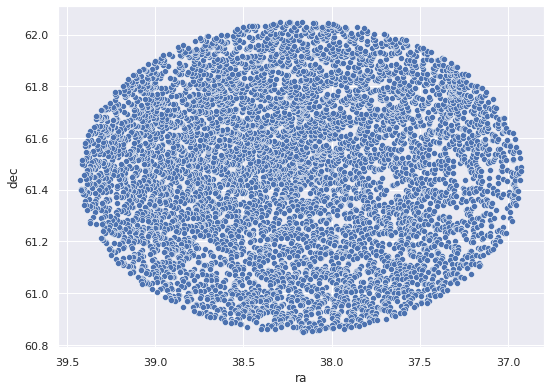

In [9]:
## plotting the skyplot 

sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot('ra', 'dec', 
                          data = all_stars_filtered)
skyplot.invert_xaxis()

#### Finding Cantat Data

In [10]:
#### Finding Cantat catalogue

catalog_list = Vizier.find_catalogs('Cantat')
{k:v.description for k,v in catalog_list.items()}

{'I/349': 'StarHorse, Gaia DR2 photo-astrometric distances (Anders+, 2019)',
 'J/A+A/561/A94': 'Velocities and photometry in Trumpler 20 (Donati+, 2014)',
 'J/A+A/564/A133': 'Gaia FGK benchmark stars: metallicity (Jofre+, 2014)',
 'J/A+A/569/A17': 'Gaia-ESO Survey: NGC6705 (Cantat-Gaudin+, 2014)',
 'J/A+A/582/A81': 'Gaia FGK benchmark stars: abundances (Jofre+, 2015)',
 'J/A+A/588/A120': 'Equivalent widths in 10 open clusters (Cantat-Gaudin+, 2016)',
 'J/A+A/591/A37': 'Gaia-ESO Survey. Parameters for cluster members (Jacobson+, 2016)',
 'J/A+A/597/A10': 'South Ecliptic Pole stars radial velocities (Fremat+, 2017)',
 'J/A+A/598/A68': 'Gaia-ESO Survey. Trumpler 23 (Overbeek+, 2017)',
 'J/A+A/601/A19': 'Gaia DR1 open cluster members (Gaia Collaboration+, 2017)',
 'J/A+A/603/A2': 'Gaia-ESO Survey abundances radial distribution (Magrini+, 2017)',
 'J/A+A/605/A79': 'TGAS Cepheids and RR Lyrae stars (Gaia Collaboration+, 2017)',
 'J/A+A/615/A49': 'TGAS stars membership in 128 open clusters (C

In [11]:
## cheking the tables in the GAIA DR2 paper

Vizier.ROW_LIMIT = -1
#catalogs = Vizier.get_catalogs(catalog_list['J/A+A/633/A99'])
#catalogs

In [12]:
## saving the whole cantat table 
## comment out the next two line if you want to save the full cantat table

# cantat_all = catalogs['J/A+A/633/A99/members'].to_pandas()
# cantat_all.to_csv('cantat_all.csv')

In [13]:
# help(Vizier)

In [14]:
## saving only IC 1805 data from Cantat

cantat_1805 = Vizier(catalog = 'J/A+A/633/A99/members', row_limit = -1).query_constraints(Cluster="IC_1805")
cantat_1805 = cantat_1805[0].to_pandas()
cantat_1805

,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,RV,Gmag,BP-RP,Proba,Cluster,_RA.icrs,_DE.icrs
0,38.153592,61.130890,465452928793998720,0.3521,-0.476,-0.863,NaN,17.732300,2.5744,0.3,IC_1805,38.153596,61.130894
1,38.148031,61.117989,465452894434262528,0.3413,-1.027,-0.231,NaN,16.749500,1.6401,0.3,IC_1805,38.148040,61.117990
2,38.253198,61.651232,465540335670181504,0.4672,-0.453,-0.891,NaN,17.607300,2.2985,0.4,IC_1805,38.253202,61.651235
3,38.300182,61.354941,465480382225858304,0.3881,-0.664,-0.846,NaN,14.744000,1.1821,1.0,IC_1805,38.300188,61.354945
4,38.429289,61.316453,465479248354610944,0.4768,-0.486,-1.095,NaN,17.565599,1.6560,0.4,IC_1805,38.429293,61.316458
...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,38.559873,61.603712,465911562577451264,0.4788,-0.142,-0.669,NaN,17.171600,1.6082,0.2,IC_1805,38.559874,61.603715
452,38.242582,61.758806,465917300660039296,0.3388,-1.648,-0.124,NaN,16.572800,1.2593,0.1,IC_1805,38.242597,61.758806
453,38.561836,61.703254,465913310627212672,0.4396,-0.690,-0.448,NaN,13.340600,0.8793,0.8,IC_1805,38.561842,61.703256
454,38.239475,61.768696,465929047388139008,0.3782,-0.733,0.198,NaN,17.888201,1.8055,0.1,IC_1805,38.239482,61.768695


In [15]:
# renaming the cantat table to match it with gaia_data
cantat_1805 = cantat_1805.rename(columns={'Source':'source_id',
                                          'Proba':'PMemb'})


In [16]:
# taking the subset of only source_id and PMemb
cantat_1805 = cantat_1805.loc[:,['source_id', 'PMemb']]


In [17]:
cantat_1805.isnull().sum()

source_id    0
PMemb        0
dtype: int64

In [18]:
# join the two table on source_id
cantat_1805 = all_stars[all_stars['parallax_over_error'] > 5].join(cantat_1805.set_index('source_id'), on='source_id')

In [19]:
cantat_1805.isnull().sum()

solution_id                0
designation                0
source_id                  0
random_index               0
ref_epoch                  0
                        ... 
lum_percentile_upper    3346
datalink_url               0
epoch_photometry_url       0
dist                       0
PMemb                   6926
Length: 98, dtype: int64

In [20]:
cantat_1805.shape

(7235, 98)

In [21]:
cantat_1805.dropna(subset=['PMemb']).shape

(309, 98)

In [22]:
# dropping the rows, where we don't have PMemb 
# (i.e. the source id was not in the cantat table)
cantat_1805 = cantat_1805.dropna(subset=['PMemb'])
cantat_1805

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,PMemb
12,1635721458409799680,Gaia DR2 465528726370386560,465528726370386560,1265691026,2015.5,38.174604,0.026692,61.455837,0.024871,0.350408,0.032867,10.661463,-0.391319,0.039899,-0.923878,0.056511,0.048533,0.069835,-0.724254,0.110574,0.030926,0.063572,-0.152112,-0.095759,-0.013781,0.093028,363,0,358,5,13.155964,829.465881,0.197810,9.855362,31,False,16.322571,1.582204,0.005890,-0.099154,...,4011.776907,12.408737,13.019259,2.141917,0,1.012991,-0.179126,1.192117,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.723230,0.924154,58.805327,43.510325,102011,5095.633301,4259.000000,6938.000000,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.005842,0.3
13,1635721458409799680,Gaia DR2 465528722079282688,465528722079282688,1058312376,2015.5,38.170187,0.016606,61.455589,0.016178,0.437090,0.021993,19.874382,-0.694467,0.023946,-0.802570,0.036297,-0.002689,0.159078,-0.754454,0.121217,0.069633,0.064263,-0.244543,-0.132432,-0.023107,-0.004449,384,0,381,3,-2.515826,310.555786,0.000000,0.000000,31,False,70.747940,1.514005,0.003501,-0.095636,...,153.224776,313.659210,13.057452,1.283723,0,1.332185,0.578085,0.754100,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.721372,0.923120,58.802553,43.511010,100001,4767.000000,4554.893066,4990.000000,NaN,NaN,NaN,NaN,NaN,NaN,200111,5.413865,4.940792,5.929817,13.636097,11.825031,15.447163,https://gea.esac.esa.int/data-server/datalink/...,,0.006048,1.0
16,1635721458409799680,Gaia DR2 465528726379401344,465528726379401344,227921180,2015.5,38.182938,0.022863,61.455661,0.024085,0.405770,0.030849,13.153267,-0.848460,0.033576,-0.766377,0.052442,0.031850,0.131654,-0.754248,0.072089,0.069546,0.017721,-0.282201,-0.115171,0.019322,0.009540,408,408,400,8,5.497458,569.689026,0.000000,0.000000,31,True,338.387543,1.618596,0.005313,-0.070005,...,351.628832,2154.513672,10.063335,1.210302,1,0.776089,0.305677,0.470411,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.726980,0.925506,58.810177,43.508449,100002,6109.666504,5640.000000,6873.419922,1.7587,1.5623,2.0748,0.9335,0.7975,1.0714,200111,14.735189,11.642467,17.291494,272.568817,239.666214,305.471405,https://gea.esac.esa.int/data-server/datalink/...,,0.006811,0.8
29,1635721458409799680,Gaia DR2 465528722077526144,465528722077526144,537680023,2015.5,38.181367,0.028767,61.442197,0.030355,0.453761,0.037817,11.998713,-0.542215,0.045610,-0.599020,0.067597,-0.014551,0.115672,-0.686150,0.128594,0.053037,0.100524,-0.214339,-0.124897,-0.041728,0.037988,324,306,315,9,18.035608,1009.378662,0.074506,2.377913,31,False,90.522102,1.565245,0.006710,-0.083890,...,101.218995,1191.624268,12.058416,1.249682,1,1.053280,0.430085,0.623195,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.731412,0.912770,58.801241,43.4966

In [23]:
# saving both cantat and Gaia files as csv
# if you want to save, comment out the next two lines

cantat_1805.to_csv('IC_1805_cantat.csv')
# all_stars.to_csv('IC_1805_Gaia_30m.csv')

In [24]:
cantat_1805.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,PMemb
count,3.090000e+02,3.090000e+02,3.090000e+02,309.0,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.0,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,...,309.000000,309.000000,3.090000e+02,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,5.000000,5.000000,309.000000,5.0,5.00000,5.000000,309.000000,309.000000,309.000000,309.000000,283.000000,283.000000,283.000000,283.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,217.0,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,309.000000,309.000000
mean,1.635721e+18,4.655536e+17,8.273567e+08,2015.5,38.192704,0.034847,61.479888,0.035954,0.442783,0.046539,11.796295,-0.824484,0.052660,-0.425825,0.079397,-0.016379,0.053593,-0.755385,0.048304,0.031758,0.036003,-0.268322,-0.039095,0.028257,-0.004180,393.750809,49.559871,390.540453,3.210356,0.950654,436.399323,0.047189,0.937856,31.0,55.126675,1.487092,0.007793,-0.044086,44.825243,15.466019,...,15.800396,41.304207,1.165745e+05,173.580252,681.313721,14.352324,1.322847,0.142395,1.448082,0.644162,0.803920,-47.089115,2.876392,0.181230,4750.0,2.60000,0.000000,134.721873,0.949942,58.830487,43.528441,100086.031802,4674.001465,4493.075195,4966.569824,2.150878,1.833521,2.514531,1.085548,0.911814,1.276234,200111.0,5.422986,4.849247,5.841270,54.233978,47.036800,61.431141,0.170618,0.474434
std,0.000000e+00,9.969951e+13,4.872798e+08,0.0,0.293296,0.016804,0.131162,0.016113,0.051812,0.021744,5.654527,0.308267,0.025830,0.355623,0.035289,0.106084,0.116794,0.033217,0.086498,0.088453,0.085628,0.133586,0.085376,0.088001,0.087112,39.731396,129.437998,39.576030,5.280240,5.805500,227.093567,0.088696,3.076893,0.0,99.228325,0.082364,0.003642,0.032757,4.419762,1.082465,...,2.007061,5.972177,6.847101e+05,1010.677324,441.733734,1.707233,0.092681,0.350021,0.429572,0.250527,0.191531,16.629325,1.743476,1.518128,500.0,0.74162,0.176777,0.132360,0.139007,0.200547,0.125231,404.048829,660.873291,644.741760,691.042969,0.557472,0.552263,0.464318,0.279791,0.275184,0.231813,0.0,6.843469,6.323979,7.256820,279.222290,242.473190,316.016998,0.092830,0.324578
min,1.635721e+18,4.654750e+17,1.440812e+07,2015.5,37.509657,0.012867,61.125531,0.013695,0.330794,0.016679,5.013821,-1.728594,0.019533,-1.281146,0.029553,-0.491299,-0.287339,-0.877849,-0.230253,-0.201980,-0.206680,-0.651846,-0.306789,-0.226258,-0.366241,177.000000,0.000000,167.000000,0.000000,-10.7

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


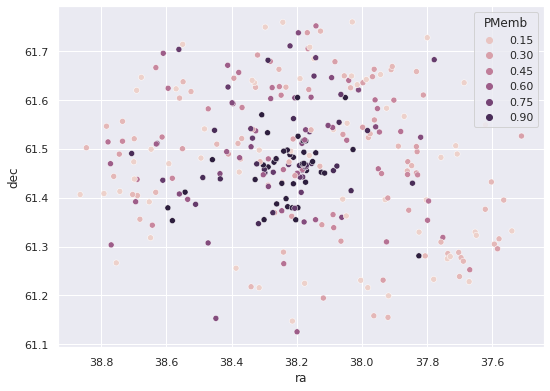

In [25]:
## plotting the skyplot 

skyplot = sns.scatterplot(cantat_1805['ra'], cantat_1805['dec'], hue = cantat_1805['PMemb'])
skyplot.invert_xaxis()

### Examining the Training Data

Separating the predictors (features) and the output (target, here PMemb) from the dataset and train the random forest model.

In [26]:
# import member dataset
member = cantat_1805.copy()

In [27]:
### adding their distance from the center of the clusters

## IC 1805
center = coord.SkyCoord.from_name('IC1805')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( ((member['ra'] - center_ra)*np.cos(np.radians(member['dec'])))**2 + (member['dec'] - center_dec)**2 )
member['dist_1805_center'] = distance

In [28]:
member['PMemb'] = np.full(len(member), 1)
member.head()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,PMemb,dist_1805_center
12,1635721458409799680,Gaia DR2 465528726370386560,465528726370386560,1265691026,2015.5,38.174604,0.026692,61.455837,0.024871,0.350408,0.032867,10.661463,-0.391319,0.039899,-0.923878,0.056511,0.048533,0.069835,-0.724254,0.110574,0.030926,0.063572,-0.152112,-0.095759,-0.013781,0.093028,363,0,358,5,13.155964,829.465881,0.197810,9.855362,31,False,16.322571,1.582204,0.005890,-0.099154,...,12.408737,13.019259,2.141917,0,1.012991,-0.179126,1.192117,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.723230,0.924154,58.805327,43.510325,102011,5095.633301,4259.000000,6938.000000,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.005842,1,0.005841
13,1635721458409799680,Gaia DR2 465528722079282688,465528722079282688,1058312376,2015.5,38.170187,0.016606,61.455589,0.016178,0.437090,0.021993,19.874382,-0.694467,0.023946,-0.802570,0.036297,-0.002689,0.159078,-0.754454,0.121217,0.069633,0.064263,-0.244543,-0.132432,-0.023107,-0.004449,384,0,381,3,-2.515826,310.555786,0.000000,0.000000,31,False,70.747940,1.514005,0.003501,-0.095636,...,313.659210,13.057452,1.283723,0,1.332185,0.578085,0.754100,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.721372,0.923120,58.802553,43.511010,100001,4767.000000,4554.893066,4990.000000,NaN,NaN,NaN,NaN,NaN,NaN,200111,5.413865,4.940792,5.929817,13.636097,11.825031,15.447163,https://gea.esac.esa.int/data-server/datalink/...,,0.006048,1,0.006043
16,1635721458409799680,Gaia DR2 465528726379401344,465528726379401344,227921180,2015.5,38.182938,0.022863,61.455661,0.024085,0.405770,0.030849,13.153267,-0.848460,0.033576,-0.766377,0.052442,0.031850,0.131654,-0.754248,0.072089,0.069546,0.017721,-0.282201,-0.115171,0.019322,0.009540,408,408,400,8,5.497458,569.689026,0.000000,0.000000,31,True,338.387543,1.618596,0.005313,-0.070005,...,2154.513672,10.063335,1.210302,1,0.776089,0.305677,0.470411,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.726980,0.925506,58.810177,43.508449,100002,6109.666504,5640.000000,6873.419922,1.7587,1.5623,2.0748,0.9335,0.7975,1.0714,200111,14.735189,11.642467,17.291494,272.568817,239.666214,305.471405,https://gea.esac.esa.int/data-server/datalink/...,,0.006811,1,0.006815
29,1635721458409799680,Gaia DR2 465528722077526144,465528722077526144,537680023,2015.5,38.181367,0.028767,61.442197,0.030355,0.453761,0.037817,11.998713,-0.542215,0.045610,-0.599020,0.067597,-0.014551,0.115672,-0.686150,0.128594,0.053037,0.100524,-0.214339,-0.124897,-0.041728,0.037988,324,306,315,9,18.035608,1009.378662,0.074506,2.377913,31,False,90.522102,1.565245,0.006710,-0.083890,...,1191.624268,12.058416,1.249682,1,1.053280,0.430085,0.623195,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.731412,0.912770,58.801241,43.496624,100002,5114.365234,5047.8647

In [29]:
### adding their distance from the center of the clusters

## IC 1805
center = coord.SkyCoord.from_name('IC1805')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( ((all_stars_filtered['ra'] - center_ra)*np.cos(np.radians(all_stars_filtered['dec'])))**2 + (all_stars_filtered['dec'] - center_dec)**2 )
all_stars_filtered['dist_1805_center'] = distance

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


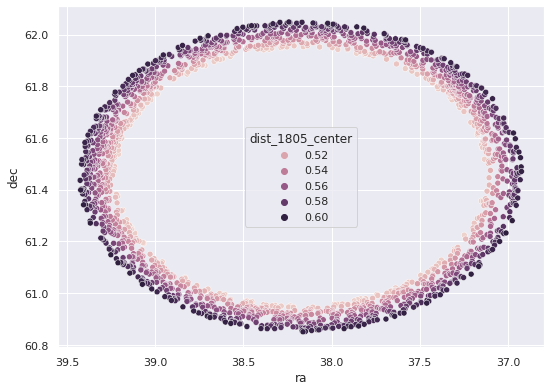

In [30]:
## plotting the skyplot 

sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot('ra', 'dec', hue = 'dist_1805_center', 
                          data = all_stars_filtered[all_stars_filtered.dist_1805_center >= 0.5])
skyplot.invert_xaxis()

In [31]:
non_member = all_stars_filtered[all_stars_filtered['dist_1805_center'] >= 0.5].sample(len(member))

In [32]:
non_member['PMemb'] = np.full(len(non_member), 0)
non_member.head()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,dist_1805_center,PMemb
52039,1635721458409799680,Gaia DR2 465491858379422720,465491858379422720,8646839,2015.5,37.712600,0.176873,60.968473,0.178471,2.178938,0.250684,8.691982,-9.019243,0.247868,-6.935679,0.390805,0.155067,-0.006834,-0.791761,0.007043,-0.102629,-0.050190,0.123399,-0.008592,0.247979,0.108286,453,0,452,1,3.513288,559.715576,0.586612,1.535279,31,False,0.275391,1.306508,0.036491,-0.051287,...,166.967682,17.557135,1.535424,0,2.487783,1.269983,1.217800,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.701088,0.388868,58.240331,43.166580,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.530529,0.531246,0
60516,1635721458409799680,Gaia DR2 513568343597532672,513568343597532672,1528442051,2015.5,37.095389,0.120350,61.711202,0.113302,1.115436,0.172171,6.478661,6.627290,0.200663,-7.316407,0.250047,-0.160993,0.148275,-0.677081,-0.122151,-0.093462,-0.021279,-0.268608,-0.095350,0.204758,-0.027821,571,0,571,0,3.547071,693.162842,0.426428,1.364780,31,False,0.423134,1.251848,0.027934,-0.054903,...,196.963867,17.336676,1.585133,0,2.695021,1.414293,1.280727,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.151399,0.969513,58.319730,43.964046,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.576390,0.574462,0
63060,1635721458409799680,Gaia DR2 465494263561118336,465494263561118336,1098097862,2015.5,37.458756,0.042107,60.971995,0.043033,0.674472,0.056436,11.951126,1.928093,0.061133,-0.572527,0.105525,0.162501,0.160851,-0.752704,-0.023602,-0.007051,-0.049344,0.044424,-0.187269,-0.000938,0.183622,442,0,439,3,0.925219,461.138794,0.000000,0.000000,31,False,4.432930,1.442106,0.009451,-0.053800,...,492.830292,15.684161,1.341146,0,1.608800,0.722046,0.886754,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.585448,0.346279,58.090064,43.223016,100001,4235.000000,4059.000000,4397.000000,NaN,NaN,NaN,NaN,NaN,NaN,200111,1.388947,1.288486,1.512009,0.559087,0.457970,0.660205,https://gea.esac.esa.int/data-server/datalink/...,,0.589460,0.590998,0
55402,1635721458409799680,Gaia DR2 465922454620863104,465922454620863104,1135173289,2015.5,38.946994,0.017096,61.858364,0.017225,1.005738,0.023674,42.482948,0.157539,0.026637,-1.718161,0.039062,0.065706,0.122129,-0.732771,-0.090124,-0.009025,-0.067363,-0.283299,-0.061899,0.129949,0.124750,372,0,372,0,-4.295734,261.954041,0.000000,0.000000,31,False,46.664997,1.545491,0.003608,-0.014775,...,1476.044067,13.594187,1.245855,1,1.130406,0.480743,0.649663,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.906136,1.437029,59.501517,43.716283,100002,4962.546875,4865.609863,5087.382812,1.2827,0.986,1.4195,0.645,0.5,0.7351,200111,1.734777,1.650685,1.804589,1.644374,1.544381,1.744367

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


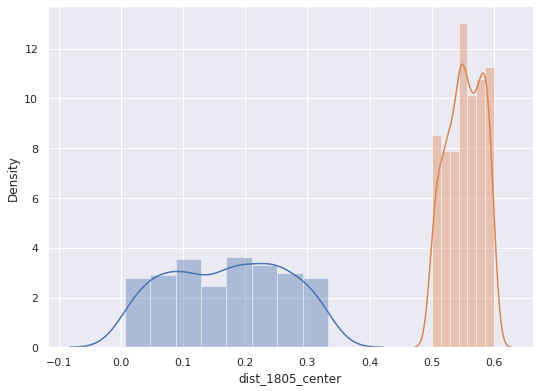

In [33]:
sns.distplot(member['dist_1805_center'])
sns.distplot(non_member['dist_1805_center'])

In [34]:
training_data = pd.concat([member, non_member])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


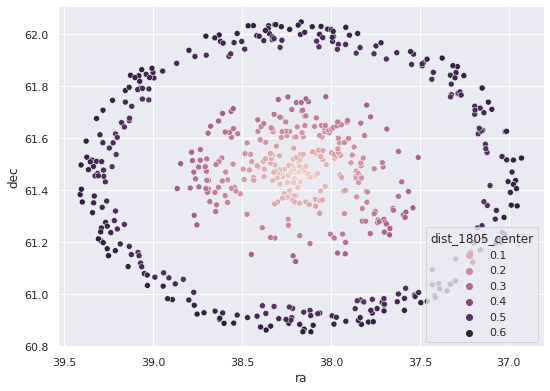

In [35]:
skyplot = sns.scatterplot('ra', 'dec', hue = 'dist_1805_center', 
                          data = training_data)
skyplot.invert_xaxis()

In [36]:
# Examining the descriptive statistics of each column
# (Notice BP-RP column has 9 less observation)
training_data.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,PMemb,dist_1805_center
count,6.180000e+02,6.180000e+02,6.180000e+02,618.0,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.0,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,...,618.000000,6.160000e+02,616.000000,616.000000,616.000000,616.000000,618.000000,616.000000,616.000000,616.000000,19.000000,19.000000,618.000000,19.000000,19.000000,19.000000,618.000000,618.000000,618.000000,618.000000,491.000000,491.000000,491.000000,491.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,386.0,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,618.000000,618.000000,618.000000
mean,1.635721e+18,4.707335e+17,8.413963e+08,2015.5,38.197751,0.052249,61.466113,0.053698,0.789443,0.072150,15.045124,0.671176,0.080681,-1.325358,0.121622,0.015172,0.047436,-0.755039,-0.018892,-0.009340,-0.012832,-0.252961,-0.036050,0.102802,0.043216,422.066343,31.063107,419.168285,2.898058,2.576122,849.865906,0.138946,10.872513,31.0,35.471516,1.456328,0.011709,-0.038573,48.079288,15.548544,...,44.174757,6.706793e+04,106.429475,637.769897,14.883430,1.365435,0.119741,1.605253,0.728921,0.876333,-27.271377,1.980306,0.550162,5223.684082,3.342105,-0.078947,134.728962,0.939018,58.825982,43.515335,100070.857434,4568.785645,4393.665527,4856.683105,1.872581,1.577441,2.183444,0.942044,0.785178,1.104338,200111.0,4.213239,3.764081,4.548210,32.932873,28.484543,37.381191,0.361979,0.500000,0.361978
std,0.000000e+00,1.483507e+16,4.816503e+08,0.0,0.595473,0.058738,0.302079,0.065838,0.853747,0.084506,17.368544,7.152476,0.095578,4.169023,0.164209,0.129038,0.115117,0.046750,0.105653,0.100192,0.095771,0.164357,0.094861,0.123640,0.100372,63.517558,106.200344,63.385555,4.700870,14.513482,7211.220703,0.409316,187.692663,0.0,77.644890,0.096550,0.014067,0.032762,7.208530,1.181327,...,8.320088,4.880994e+05,741.413031,440.327911,1.690686,0.210954,0.334749,0.486310,0.296698,0.227985,25.433408,1.507815,3.303881,606.073120,0.782670,0.354070,0.283548,0.303021,0.402331,0.295012,368.594296,592.736023,582.506042,606.936951,0.733507,0.693638,0.741368,0.372493,0.344655,0.378268,0.0,5.845016,5.349146,6.271007,211.108047,183.272385,238.982529,0.203415,0.500405,0.203429
min,1.635721e+18,4.652753e+17,5.895700e+04,2015.5,36.928582,0.012176,60.855092,0.013076,0.228960,0.016679,5.013821,-25.954325,0.017901,-42.243128,0.029173,-0.491299,-0.305317,-0.889194,-0.406345,-0.528681,-0.580453,-0.653971,-0.306789,-0.226258,-0.366241,123.00000

In [37]:
# correlation of PMemb with other variables
training_data.corr().PMemb.dropna().sort_values()

dist                           -0.941503
dist_1805_center               -0.941440
parallax_pmdec_corr            -0.603403
rv_template_logg               -0.582168
rv_template_teff               -0.479872
                                  ...   
e_bp_min_rp_percentile_upper    0.405338
dec_parallax_corr               0.410522
dec_pmra_corr                   0.510323
ra_pmdec_corr                   0.636516
PMemb                           1.000000
Name: PMemb, Length: 90, dtype: float64

In [38]:
# Choosing the predictors
# Usual Parameters

feature_columns = ['parallax',
                   'pmra', 'pmdec']

features = training_data.loc[:,feature_columns]
targets = training_data['PMemb']

In [39]:
# Dropping the NULL values from the using training set
# adding features and targets in a training set
training_set = pd.concat((features, targets), axis=1)

# dropping NA
training_set = training_set.dropna()

# finding where dtype is float64 as the built-in radom forest package 
# don't take 64-bit-float
float64_data = np.where(training_set.dtypes == 'float64')[0] 

# change the data type to float32 from float64
training_set.iloc[:, float64_data] = training_set.iloc[:, float64_data].astype('float32')


# set features, targets again
features, targets = training_set.iloc[:,:-1], training_set.iloc[:,-1]

features.describe()

,parallax,pmra,pmdec
count,618.000000,618.000000,618.000000
mean,0.789443,0.671176,-1.325358
std,0.853747,7.152477,4.169024
min,0.228960,-25.954325,-42.243130
25%,0.422123,-1.091836,-1.093524
50%,0.481254,-0.717546,-0.509885
75%,0.759990,0.231504,-0.049074
max,9.586014,88.913208,13.008345


In [40]:
# Profile report of the full training_set
# pd_prof.ProfileReport(training_set)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


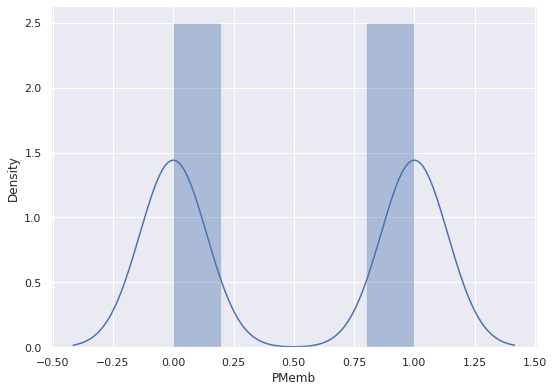

In [41]:
# histogram of PMemb in the training data
sns.distplot(training_set['PMemb'])
plt.show()

In [42]:
# Probable members (PMemb >= 0.5) in this dataset
len(training_set[training_set['PMemb'] >= 0.5])

309

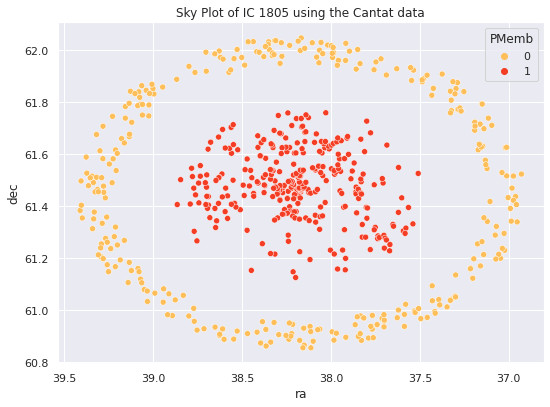

In [43]:
sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot(x = 'ra', y='dec', palette='YlOrRd', hue = 'PMemb', data = training_data)
skyplot.invert_xaxis()
plt.title('Sky Plot of IC 1805 using the Cantat data')
plt.show()

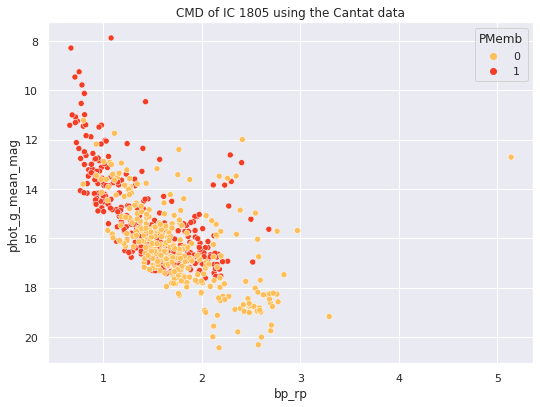

In [44]:
# CMD marked with the membership probabilities of the stars 
# (PMemb >= 0.5 stars are the probable stars)
cmd = sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag', palette='YlOrRd', hue = 'PMemb', data = training_data)
cmd.invert_yaxis()
plt.title('CMD of IC 1805 using the Cantat data')
plt.show()

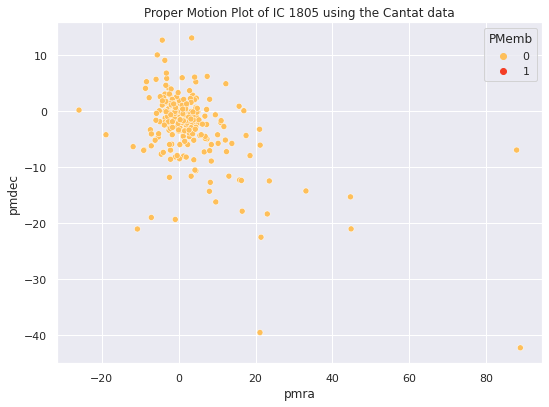

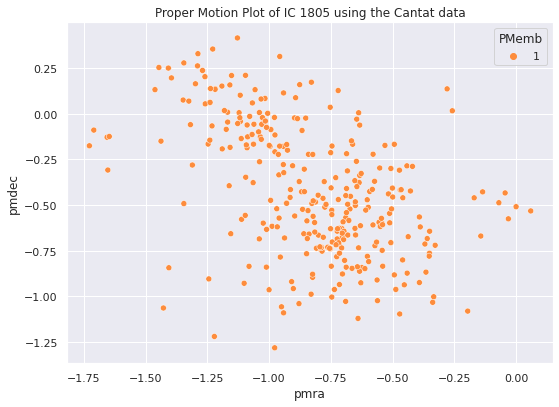

In [45]:
# proper motion plot marked with the membership probabilities of the stars 

pm_plot = sns.scatterplot(x = 'pmra', y='pmdec', palette='YlOrRd', hue = 'PMemb', data = training_set)
plt.title('Proper Motion Plot of IC 1805 using the Cantat data')
plt.show()
pm_plot = sns.scatterplot(x = 'pmra', y='pmdec', palette='YlOrRd', hue = 'PMemb', data = member)
plt.title('Proper Motion Plot of IC 1805 using the Cantat data')
plt.show()

In [46]:
from sklearn.ensemble import RandomForestClassifier
# Use Random Forest on whole dataset using 100 different trees 
rfc = RandomForestClassifier(n_estimators = 100, oob_score = True)
rfc.fit(features, targets)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [47]:
# checking the feature importance, 
# ( this is higher for a variable if the model efficiency become lower as we remove that variable)
feature_imp = pd.Series(rfc.feature_importances_, index=features.columns).sort_values(ascending = False)
feature_imp

parallax    0.403193
pmra        0.312884
pmdec       0.283923
dtype: float64

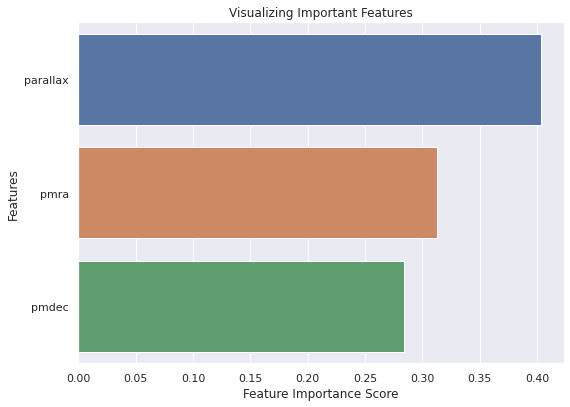

In [48]:
# plotting as a barplot

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Estimating the Model Accuracy in Test Data

In [62]:
# function for splitting a given dataset into training and test dataset

import random
# X = predictors, Y = target
def test_train_split(X, Y, test_ratio):
  ntest = int(len(X)*test_ratio) 
  ntrain = int(len(X) - ntest)

  # randomly select ntest number of rows from the full dataset as test_index and mark others as train_index.
  ind_test = random.sample(range(len(X)), k = ntest)
  ind_train = list(set(range(len(X))) - set(ind_test))

  # test and train dataset has the observations of test_indices and train_indices respectively
  test_X = X.iloc[ind_test]
  test_Y = Y.iloc[ind_test]

  train_X = X.iloc[ind_train]
  train_Y = Y.iloc[ind_train]

  return test_X, test_Y, train_X, train_Y

In [63]:
# splitting our dataset using 0.3 test ratio (30% test data, 70% train data)
test_features, test_targets, train_features, train_targets = test_train_split(features, targets, 0.3)


In [64]:
# train the model using only training subset
rfc.fit(train_features, train_targets)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [65]:
# find the accuracy rate to predict the outcome for test subset
test_predict = rfc.predict(test_features)
rfc.score(test_features, test_targets)

0.9297297297297298

In [66]:
# plot Predicted vs True Targets in Test Subset

#sns.scatterplot(test_predict, test_targets)
#plt.title('Predicted vs True Targets in Test Subset')
#plt.ylabel('True Targets')
#plt.xlabel('Predicted Targets')
#plt.show()

In [67]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, classification_report

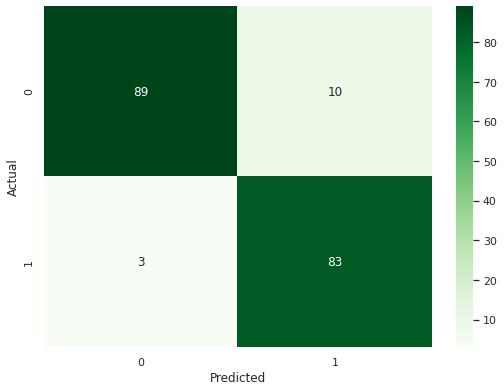

Accuracy Score: 0.93
Precision score: 0.89
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.90      0.93        99
           1       0.89      0.97      0.93        86

    accuracy                           0.93       185
   macro avg       0.93      0.93      0.93       185
weighted avg       0.93      0.93      0.93       185



In [68]:
sns.heatmap(confusion_matrix(test_targets, test_predict), cmap= 'Greens', annot = True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print('Accuracy Score: %.2f' % accuracy_score(test_targets, test_predict))
print('Precision score: %.2f' % precision_score(test_targets, test_predict))
print("Classification Report: \n", classification_report(test_targets, test_predict))


In [69]:
# Check with different test ratio

test_ratio = np.linspace(0.95, 0.05, 19)
print(test_ratio)

[0.95 0.9  0.85 0.8  0.75 0.7  0.65 0.6  0.55 0.5  0.45 0.4  0.35 0.3
 0.25 0.2  0.15 0.1  0.05]


In [70]:
# for each test_ratio, estimate the accuracy of the model

accuracy_rate = []
precision_rate = []

rfc = RandomForestClassifier(n_estimators = 100, oob_score = True)

for ratio in test_ratio:
  
  accuracy = 0
  precision = 0
  for iter in range(10):
    test_features, test_targets, train_features, train_targets = test_train_split(features, targets, ratio)

    # train the model using only training subset
    rfc.fit(train_features, train_targets)

    # find the accuracy rate to predict the outcome for test subset
    test_predict = rfc.predict(test_features)
    accuracy += rfc.score(test_features, test_targets)
    precision += precision_score(test_targets, test_predict)

  accuracy_rate.append(accuracy/10)
  precision_rate.append(precision/10)

print(accuracy_rate)

[0.8884156729131176, 0.9174460431654676, 0.9257142857142856, 0.9184210526315788, 0.9377969762419005, 0.9356481481481481, 0.9379052369077305, 0.9386486486486488, 0.9383480825958701, 0.9420711974110032, 0.9370503597122303, 0.9380566801619434, 0.9402777777777777, 0.9513513513513512, 0.9467532467532468, 0.9398373983739837, 0.9369565217391305, 0.9426229508196722, 0.9166666666666667]


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


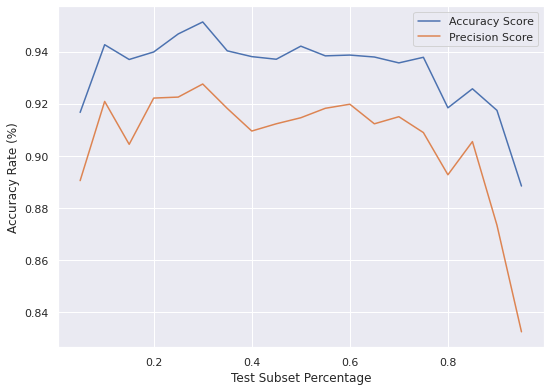

In [71]:
# plotting the accuracy rate vs test-ratio

sns.lineplot(test_ratio, accuracy_rate, label = 'Accuracy Score')
sns.lineplot(test_ratio, precision_rate, label= 'Precision Score')
plt.xlabel('Test Subset Percentage')
plt.ylabel('Accuracy Rate (%)')
plt.legend()
plt.show()

### Prediction of PMemb for the new stars

In [ ]:
# descriptive stats
all_stars_filtered.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,dist_1805_center
count,7.235000e+03,7.235000e+03,7.235000e+03,7235.0,7235.000000,7235.000000,7235.000000,7235.000000,7235.000000,7235.000000,7235.000000,7235.000000,7235.000000,7235.000000,7235.000000,7235.000000,7235.000000,7235.000000,7235.000000,7235.000000,7235.000000,7235.000000,7235.000000,7235.000000,7235.000000,7235.000000,7235.000000,7235.000000,7235.000000,7235.000000,7235.000000,7235.000000,7.235000e+03,7235.0,7235.000000,7234.000000,7234.000000,7235.000000,7235.000000,7235.000000,...,7193.000000,7235.000000,7.193000e+03,7193.000000,7193.000000,7193.000000,7193.000000,7235.000000,7193.000000,7193.000000,7193.000000,258.000000,258.000000,7235.000000,258.000000,258.000000,258.000000,7235.000000,7235.000000,7235.000000,7235.000000,4858.000000,4858.000000,4858.000000,4858.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,3889.0,3889.000000,3889.000000,3889.000000,3889.000000,3889.000000,3889.000000,7235.000000,7235.000000
mean,1.635721e+18,4.710731e+17,8.490684e+08,2015.5,38.234069,0.069344,61.466724,0.070395,1.076295,0.095315,17.547956,1.476574,0.106758,-2.060181,0.158137,0.024561,0.041111,-0.751727,-0.033464,-0.028082,-0.024196,-0.238398,-0.030551,0.114896,0.055267,420.438010,18.374015,417.682101,2.755909,3.822416,962.897034,0.222175,1.321747e+01,31.0,21.216928,1.427235,0.015332,-0.033983,47.908915,15.533103,...,17.087580,43.728680,4.018367e+04,65.743234,573.488281,15.340632,1.399819,0.091914,1.746929,0.801396,0.945535,-27.238912,1.706078,0.550657,5258.720703,3.472868,-0.063953,134.744833,0.946259,58.847979,43.508412,100053.058254,4406.255859,4235.801758,4701.469727,1.636582,1.362499,1.936936,0.817958,0.676363,0.973017,200111.0,3.111452,2.720064,3.363122,10.577373,9.007964,12.146854,0.389511,0.389453
std,0.000000e+00,1.521712e+16,4.908142e+08,0.0,0.603040,0.088600,0.298323,0.089474,1.149362,0.121590,24.326473,8.407149,0.140060,6.762113,0.208486,0.126287,0.127551,0.050930,0.096797,0.095453,0.085793,0.167675,0.094605,0.110973,0.094831,60.119896,85.350054,59.918202,4.119063,16.470339,7070.418457,0.623399,1.683310e+02,0.0,56.793392,0.089122,0.019132,0.032319,6.836482,1.178136,...,1.842195,8.287984,3.515418e+05,774.577671,422.542145,1.588089,0.212103,0.300188,0.434249,0.269247,0.212872,31.063894,2.295877,3.104978,716.448975,0.632486,0.305238,0.289106,0.297309,0.400407,0.295980,318.294058,497.617218,497.619263,505.148499,0.724856,0.709191,0.748820,0.367315,0.356283,0.383090,0.0,4.545385,3.987911,4.908094,94.363480,80.421616,108.488144,0.146059,0.146020
min,1.635721e+18,4.652752e+17,5.895700e+04,2015.5,36.923003,0.012176,60.850139,0.011563,0.126837,0.016679,5.000302,-49.057160,0.017901,-159.179629,0.026448,-0.688963,-0.505424

In [ ]:
all_stars_filtered = all_stars_filtered.dropna(subset = feature_columns)

In [ ]:
# select the set of predictor variables from the new dataset
new_features = all_stars_filtered.loc[:, feature_columns]
new_features = new_features.astype('float32')

In [ ]:
# train the model again using all the features and targets of the previous dataset
rfr.fit(features, targets)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
# estimate the membership probability of the stars
all_stars_filtered['PMemb'] = rfr.predict(new_features)
sum(all_stars_filtered['PMemb'] >= 0.5)

815

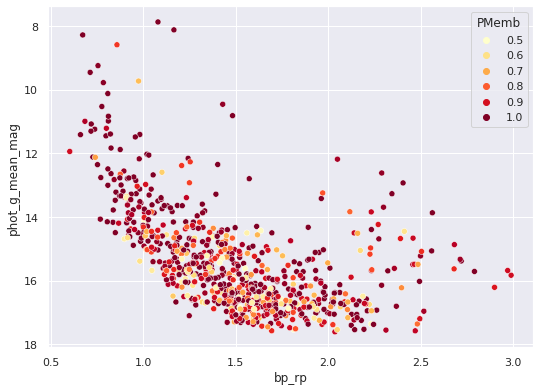

In [ ]:
# CMD of probable members 

cmd = sns.scatterplot(x = 'bp_rp', y = 'phot_g_mean_mag', hue= 'PMemb', 
                      palette='YlOrRd', data = all_stars_filtered[all_stars_filtered['PMemb'] >= 0.5] )
cmd.invert_yaxis()

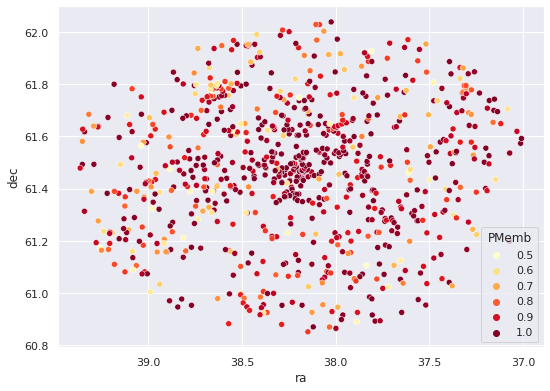

In [ ]:
skyplot = sns.scatterplot(x = 'ra', y = 'dec', hue= 'PMemb', 
                      palette='YlOrRd', data = all_stars_filtered[all_stars_filtered['PMemb'] >= 0.5] )
skyplot.invert_xaxis()

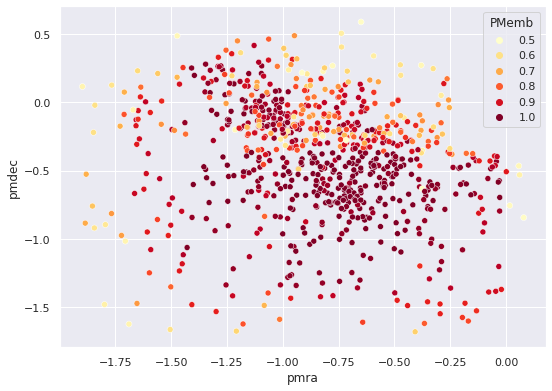

In [ ]:
# pm plot
sns.scatterplot(x = 'pmra', y = 'pmdec', hue= 'PMemb', 
                      palette='YlOrRd', data = all_stars_filtered[all_stars_filtered['PMemb'] >= 0.5] )

In [ ]:
potentialMember = all_stars_filtered[all_stars_filtered['PMemb'] >= 0.5]
len(potentialMember)

815

In [ ]:
potentialMember.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,dist_1805_center,PMemb
count,8.150000e+02,8.150000e+02,8.150000e+02,815.0,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.0,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,...,815.000000,8.150000e+02,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,8.000000,8.000000,815.000000,8.000000,8.000000,8.000000,815.000000,815.000000,815.000000,815.000000,748.000000,748.000000,748.000000,748.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,549.0,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,815.000000,815.000000,815.000000
mean,1.635721e+18,4.700792e+17,8.410811e+08,2015.5,38.212775,0.035866,61.469051,0.036556,0.435865,0.048789,10.826588,-0.835362,0.054346,-0.412762,0.082132,0.011150,0.052435,-0.757321,-0.018236,-0.007886,-0.009215,-0.268159,-0.041018,0.088210,0.043820,417.420859,31.727607,414.606135,2.814724,0.900260,457.895630,0.047292,1.166782,31.0,37.113182,1.476297,0.007938,-0.037690,47.542331,15.602454,...,43.995092,8.847975e+04,127.673296,656.868225,14.647531,1.328684,0.110429,1.510044,0.680695,0.829349,-49.377084,2.013976,0.139877,4843.750000,2.750000,0.000000,134.734797,0.944301,58.836626,43.514742,100054.635027,4568.756836,4398.058594,4853.298340,2.180911,1.868774,2.550666,1.098282,0.932096,1.290417,200111.0,4.875199,4.332296,5.248004,40.797558,34.873352,46.721775,0.324887,0.324852,0.900920
std,0.000000e+00,1.396097e+16,4.938579e+08,0.0,0.527947,0.015954,0.261149,0.015224,0.056361,0.021127,5.153217,0.380792,0.024536,0.430049,0.034089,0.116203,0.122828,0.041423,0.100905,0.093825,0.085983,0.146076,0.089710,0.105246,0.094035,55.243271,109.059817,55.011486,4.198254,5.439894,238.738861,0.093323,4.203298,0.0,78.287521,0.075990,0.003448,0.030208,6.250532,1.102374,...,6.995434,6.378088e+05,948.674846,388.069611,1.495485,0.117686,0.313617,0.408757,0.244542,0.179521,14.018881,1.784058,1.546198,399.497467,0.597614,0.133631,0.259380,0.254017,0.340847,0.265839,323.080482,573.624878,566.650879,593.555664,0.560224,0.563089,0.476810,0.284831,0.284616,0.243283,0.0,6.230913,5.758757,6.595357,241.390915,205.214218,277.990601,0.163821,0.163800,0.126593
min,1.635721e+18,4.652752e+17,1.335950e+05,2015.5,37.007523,0.012574,60.851725,0.013377,0.329878,0.016679,5.013821,-1.897450,0.017901,-1.679816,0.029524,-0.491299,-0.305317,-0.889194,-0.281027,-0.343397,-0.251589,-0.680021,-0.306789,-0.226258,-0.366241,177.000000,0.000000,16

In [ ]:
member.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,PMemb,dist_1805_center
count,3.090000e+02,3.090000e+02,3.090000e+02,309.0,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.0,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,...,309.000000,3.090000e+02,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,5.000000,5.000000,309.000000,5.0,5.00000,5.000000,309.000000,309.000000,309.000000,309.000000,283.000000,283.000000,283.000000,283.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,217.0,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,309.000000,309.0,309.000000
mean,1.635721e+18,4.655536e+17,8.273567e+08,2015.5,38.192704,0.034847,61.479888,0.035954,0.442783,0.046539,11.796295,-0.824484,0.052660,-0.425825,0.079397,-0.016379,0.053593,-0.755385,0.048304,0.031758,0.036003,-0.268322,-0.039095,0.028257,-0.004180,393.750809,49.559871,390.540453,3.210356,0.950654,436.399323,0.047189,0.937856,31.0,55.126675,1.487092,0.007793,-0.044086,44.825243,15.466019,...,41.304207,1.165745e+05,173.580252,681.313721,14.352324,1.322847,0.142395,1.448082,0.644162,0.803920,-47.089115,2.876392,0.181230,4750.0,2.60000,0.000000,134.721873,0.949942,58.830487,43.528441,100086.031802,4674.001465,4493.075195,4966.569824,2.150878,1.833521,2.514531,1.085548,0.911814,1.276234,200111.0,5.422986,4.849247,5.841270,54.233978,47.036800,61.431141,0.170618,1.0,0.170617
std,0.000000e+00,9.969951e+13,4.872798e+08,0.0,0.293296,0.016804,0.131162,0.016113,0.051812,0.021744,5.654527,0.308267,0.025830,0.355623,0.035289,0.106084,0.116794,0.033217,0.086498,0.088453,0.085628,0.133586,0.085376,0.088001,0.087112,39.731396,129.437998,39.576030,5.280240,5.805500,227.093567,0.088696,3.076893,0.0,99.228325,0.082364,0.003642,0.032757,4.419762,1.082465,...,5.972177,6.847101e+05,1010.677324,441.733734,1.707233,0.092681,0.350021,0.429572,0.250527,0.191531,16.629325,1.743476,1.518128,500.0,0.74162,0.176777,0.132360,0.139007,0.200547,0.125231,404.048829,660.873291,644.741760,691.042969,0.557472,0.552263,0.464318,0.279791,0.275184,0.231813,0.0,6.843469,6.323979,7.256820,279.222290,242.473190,316.016998,0.092830,0.0,0.092849
min,1.635721e+18,4.654750e+17,1.440812e+07,2015.5,37.509657,0.012867,61.125531,0.013695,0.330794,0.016679,5.013821,-1.728594,0.019533,-1.281146,0.029553,-0.491299,-0.287339,-0.877849,-0.230253,-0.201980,-0.206680,-0.651846,-0.306789,-0.226258,-0.366241,177.000000,0.000000,167.000000,0.000000,-10.749668,159.062073

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


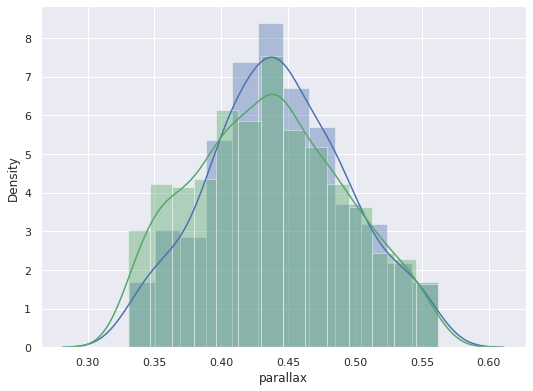

In [ ]:
sns.distplot(member['parallax'], color = 'b')
sns.distplot(potentialMember['parallax'], color = 'g')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


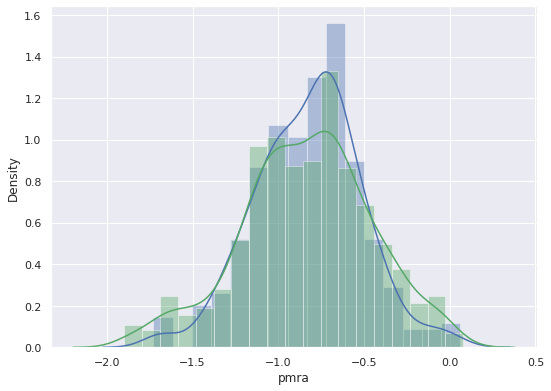

In [ ]:
sns.distplot(member['pmra'], color = 'b')
sns.distplot(potentialMember['pmra'], color = 'g')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


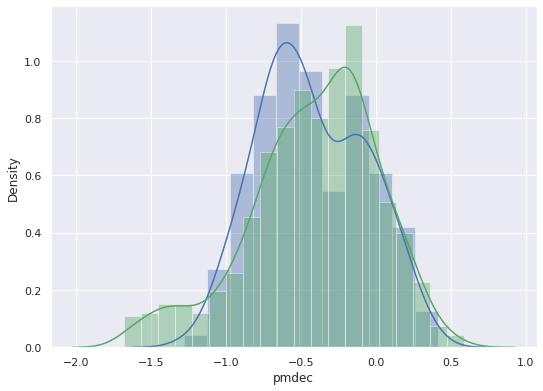

In [ ]:
sns.distplot(member['pmdec'], color = 'b')
sns.distplot(potentialMember['pmdec'], color = 'g')

In [ ]:
# saving the files as csv
# all_stars.to_csv('gaia_1805_membership_prob.csv')

potentialMember.to_csv('IC_1805_membership_prob.csv')


### Comparing the new and old probable members

In [ ]:
# creating subset for the potential member in previous dataset

concatenated = pd.concat([potentialMember.assign(dataset='New_member'), member.assign(dataset='Old_member')])


In [ ]:
concatenated

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,dist_1805_center,PMemb,dataset
12,1635721458409799680,Gaia DR2 465528726370386560,465528726370386560,1265691026,2015.5,38.174604,0.026692,61.455837,0.024871,0.350408,0.032867,10.661463,-0.391319,0.039899,-0.923878,0.056511,0.048533,0.069835,-0.724254,0.110574,0.030926,0.063572,-0.152112,-0.095759,-0.013781,0.093028,363,0,358,5,13.155964,829.465881,0.197810,9.855362,31,False,16.322571,1.582204,0.005890,-0.099154,...,13.019259,2.141917,0,1.012991,-0.179126,1.192117,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.723230,0.924154,58.805327,43.510325,102011,5095.633301,4259.000000,6938.000000,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.005842,0.005841,0.96,New_member
13,1635721458409799680,Gaia DR2 465528722079282688,465528722079282688,1058312376,2015.5,38.170187,0.016606,61.455589,0.016178,0.437090,0.021993,19.874382,-0.694467,0.023946,-0.802570,0.036297,-0.002689,0.159078,-0.754454,0.121217,0.069633,0.064263,-0.244543,-0.132432,-0.023107,-0.004449,384,0,381,3,-2.515826,310.555786,0.000000,0.000000,31,False,70.747940,1.514005,0.003501,-0.095636,...,13.057452,1.283723,0,1.332185,0.578085,0.754100,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.721372,0.923120,58.802553,43.511010,100001,4767.000000,4554.893066,4990.000000,NaN,NaN,NaN,NaN,NaN,NaN,200111,5.413865,4.940792,5.929817,13.636097,11.825031,15.447163,https://gea.esac.esa.int/data-server/datalink/...,,0.006048,0.006043,1.00,New_member
16,1635721458409799680,Gaia DR2 465528726379401344,465528726379401344,227921180,2015.5,38.182938,0.022863,61.455661,0.024085,0.405770,0.030849,13.153267,-0.848460,0.033576,-0.766377,0.052442,0.031850,0.131654,-0.754248,0.072089,0.069546,0.017721,-0.282201,-0.115171,0.019322,0.009540,408,408,400,8,5.497458,569.689026,0.000000,0.000000,31,True,338.387543,1.618596,0.005313,-0.070005,...,10.063335,1.210302,1,0.776089,0.305677,0.470411,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.726980,0.925506,58.810177,43.508449,100002,6109.666504,5640.000000,6873.419922,1.7587,1.5623,2.0748,0.9335,0.7975,1.0714,200111,14.735189,11.642467,17.291494,272.568817,239.666214,305.471405,https://gea.esac.esa.int/data-server/datalink/...,,0.006811,0.006815,1.00,New_member
29,1635721458409799680,Gaia DR2 465528722077526144,465528722077526144,537680023,2015.5,38.181367,0.028767,61.442197,0.030355,0.453761,0.037817,11.998713,-0.542215,0.045610,-0.599020,0.067597,-0.014551,0.115672,-0.686150,0.128594,0.053037,0.100524,-0.214339,-0.124897,-0.041728,0.037988,324,306,315,9,18.035608,1009.378662,0.074506,2.377913,31,False,90.522102,1.565245,0.006710,-0.083890,...,12.058416,1.249682,1,1.053280,0.430085,0.623195,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.731412,0.912770,58.801241,43.496624,100002,5114.365234,5047.864746,5224.460449,NaN,NaN,N

In [ ]:
concatenated.dataset.value_counts()

New_member    815
Old_member    309
Name: dataset, dtype: int64

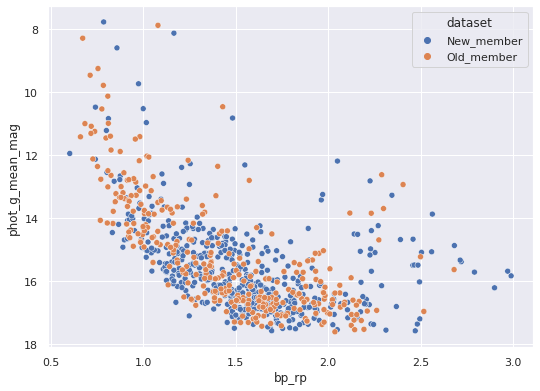

In [ ]:
cmd = sns.scatterplot(x='bp_rp', y='phot_g_mean_mag', data=concatenated,
                hue='dataset')
cmd.invert_yaxis()

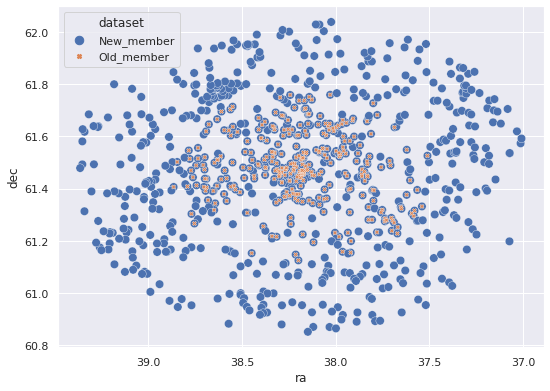

In [ ]:
skyplot = sns.scatterplot(x='ra', y='dec', data=concatenated,
                size='dataset', hue='dataset', style = 'dataset')
skyplot.invert_xaxis()

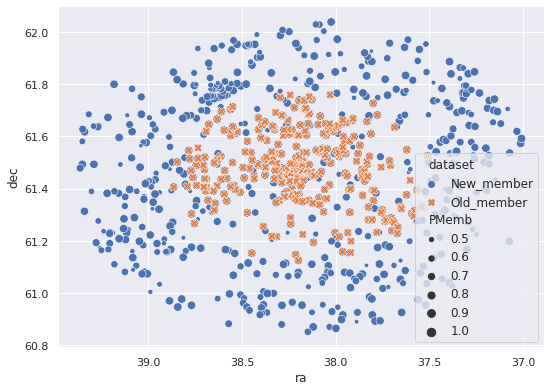

In [ ]:
skyplot = sns.scatterplot(x='ra', y='dec', data=concatenated,
                size='PMemb', hue='dataset', style = 'dataset')
skyplot.invert_xaxis()

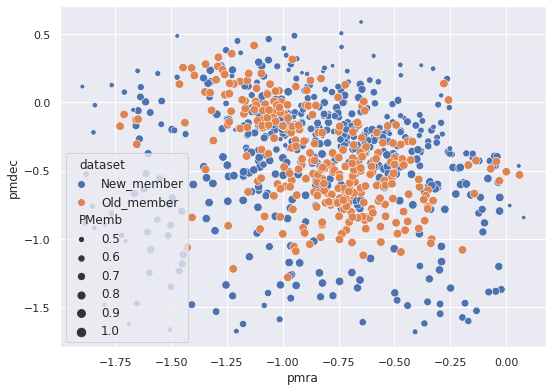

In [ ]:
# proper motion plot

sns.scatterplot(x='pmra', y='pmdec', data=concatenated,
                size='PMemb', hue='dataset')

In [ ]:
# pd_prof.ProfileReport(potentialMember)

In [ ]:
#files.download('IC_1805_cantat.csv')

#files.download('IC_1805_membership_prob.csv')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


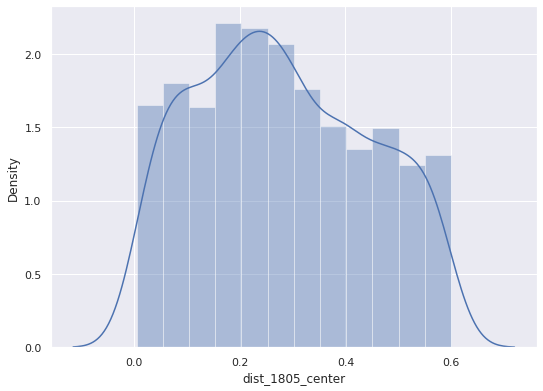

In [ ]:
sns.distplot(concatenated['dist_1805_center'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


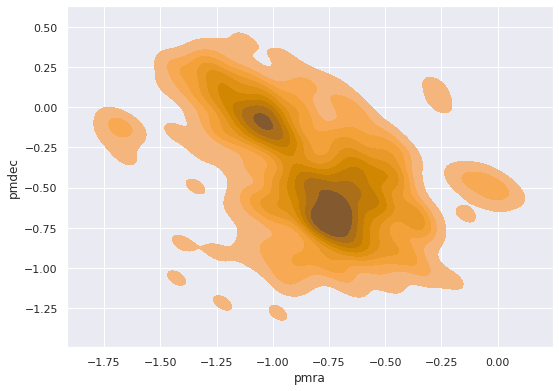

In [ ]:
sns.kdeplot('pmra', 'pmdec', data = member, shade=True, color = 'orange', bw = 0.20)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


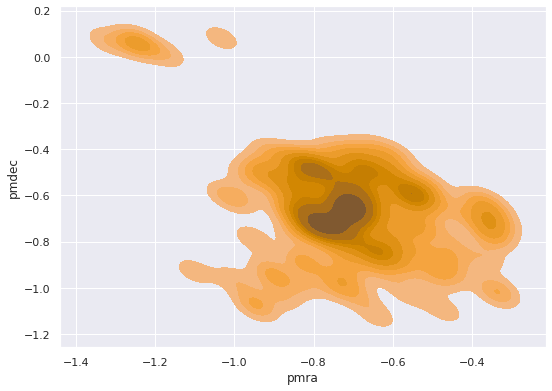

In [ ]:
sns.kdeplot('pmra', 'pmdec', data = cantat_1805[cantat_1805['PMemb'] >= 0.5], shade=True, color = 'orange', bw = 0.20)

In [ ]:
len(cantat_1805[cantat_1805['PMemb'] >= 0.5])

143

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


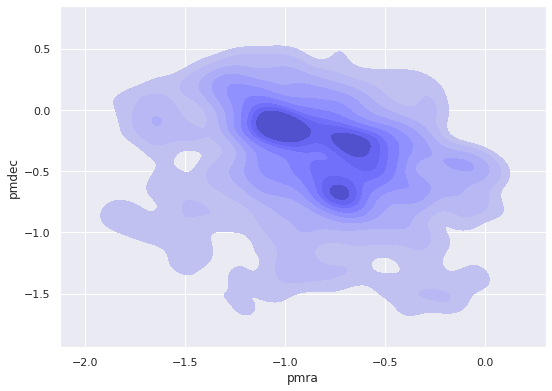

In [ ]:
sns.kdeplot('pmra', 'pmdec', data = potentialMember, shade=True, color = 'blue', bw = 0.20)

In [ ]:
potentialMember['radial_velocity'].dropna()

3012    -40.930351
7781    -60.031062
12522   -42.743113
18400   -48.516509
18653   -24.907990
21123   -66.833061
31804   -64.665143
41380   -46.389440
Name: radial_velocity, dtype: float64

In [ ]:
member['radial_velocity'].dropna()

3012    -40.930351
7781    -60.031062
12522   -42.743113
18653   -24.907990
21123   -66.833061
Name: radial_velocity, dtype: float64

In [ ]:
member['radial_velocity_error'].dropna()

3012     3.985411
7781     3.243520
12522    1.968749
18653    0.377562
21123    4.806718
Name: radial_velocity_error, dtype: float64